### 간단한 이상 탐지 예제를 파이토치로 구현 이 예제에서는 One-class-svm을 사용하여 데이터 이상을 탐지

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

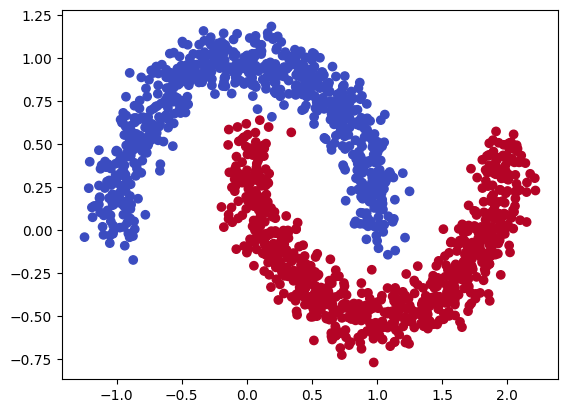

In [2]:
x, y = make_moons(n_samples=1500, noise=0.1, random_state=777)

# 데이터 시각화
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm)
plt.show()

In [3]:
outliers_ratio = 0.1                        # 이상치 비율
n_outliers = int(outliers_ratio * len(x))   # 이상치 데이터개수
n_inliers = len(x) - n_outliers             # 정상 데이터 개수

rng = np.random.RandomState(777)            # 난수 생성 객체 
x_outliers = 1.5 * rng.uniform(low=-1, high=3, size=(n_outliers, 2)) 
# 이상치 데이터 생성 난수 생성을이용해서 uniform 분포를 따르는 값을 생성 -> 1.5배 해서 이상치 데이터를 생성
x = np.vstack([x, x_outliers]) # 이상치 데이터를 기존 데이터 추가
y = np.hstack([y, -1 * np.ones(n_outliers)]) # 이상치 데이터의 클래스는 -1로 설정합니다

In [4]:
# 데이터 정규화
x = (x-x.mean(axis=0)) / x.std(axis=0)

# 학습 데이터 평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=777)

# One-class SVM 모델 학습
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
model.fit(X_train)

# 이상치 탐지 
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == 1, 0, y_pred)
score = f1_score(y_test, y_pred, average='macro')

print(f"F1 Score : {score}")

F1 Score : 0.385644087827331
